In [2]:
ctrl_A = anndata.read_h5ad('E://human/10X_Visium_hunter2021spatially_sample_A_data.h5ad')
#adata_A = anndata.read_h5ad('E://human/10X_Visium_hunter2021spatially_sample_A_data.h5ad')
#adata_B = anndata.read_h5ad('E://human/10X_Visium_hunter2021spatially_sample_B_data.h5ad')
#adata_C = anndata.read_h5ad('E://human/10X_Visium_hunter2021spatially_sample_C_data.h5ad')

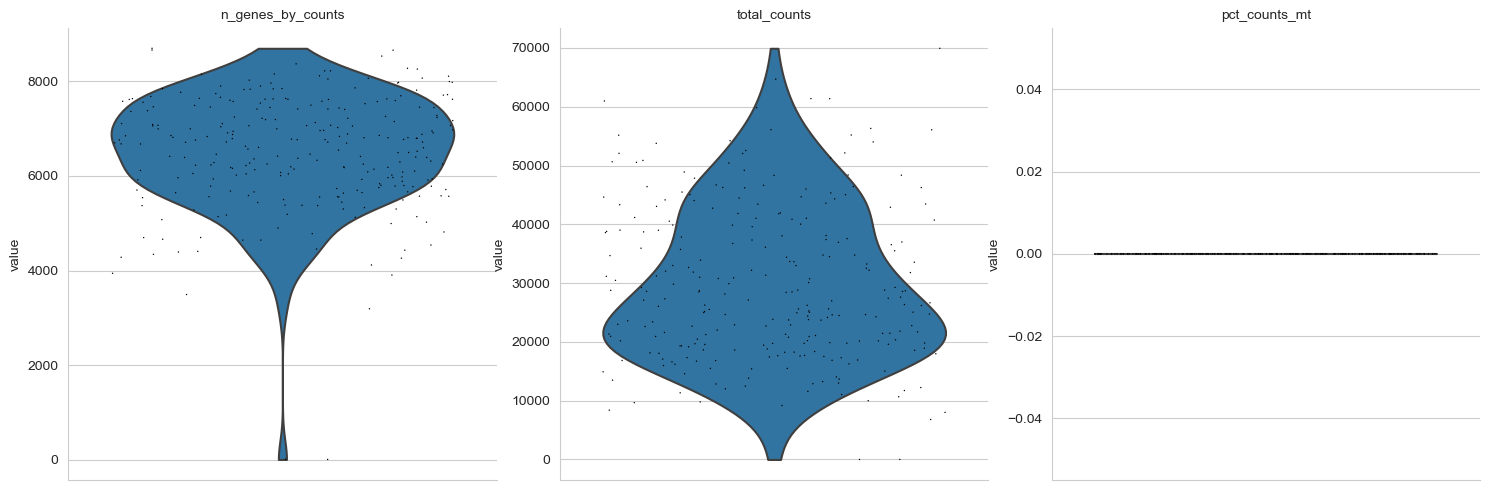

In [1]:
import numpy as np

from util import *
from Algorithm.graph import *
from Algorithm.distribution import *
from IO.read_10X import *

h5_path = 'E://human/GSM4838131_Visium_Sample_A_filtered_feature_bc_matrix.h5'
csv_path = 'E://human/GSM4838131_Visium_Sample_A_tissue_positions_list.csv'

h5_path = 'E://human/GSM4838133_Visium_Sample_C_filtered_feature_bc_matrix.h5'
csv_path = 'E://human/GSM4838133_Visium_Sample_C_tissue_positions_list.csv'

h5_path = '/Users/sunpeisen/Downloads/data/GSM4838132_Visium_Sample_B_filtered_feature_bc_matrix.h5'
csv_path = '/Users/sunpeisen/Downloads/data/GSM4838132_Visium_Sample_B_tissue_positions_list.csv'

h5_path = 'E://human/GSM4838132_Visium_Sample_B_filtered_feature_bc_matrix.h5'
csv_path = 'E://human/GSM4838132_Visium_Sample_B_tissue_positions_list.csv'

adata = read_10X_h5ad('F://Rep11_MOB_ST.h5ad', amplification=1000, bin_size=20)
adata.var_names_make_unique()
sc.pp.calculate_qc_metrics(adata, inplace=True)

#sc.pp.filter_genes(adata, min_cells=2)
adata.var['mt'] = adata.var_names.str.startswith('mt-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
adata.var_names_make_unique()

#adata = adata[adata.obs["pct_counts_mt"] < 8]
sc.pl.violin(adata,
             ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)
sc.pp.filter_genes(adata, min_cells=50)
sc.pp.normalize_total(adata, inplace=True)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

In [2]:
result = convolve(get_3d_matrix(adata), kernel=get_gaussian_kernel(size=3))
update_anndata(result, adata)

Transfer anndata to 3D matrix...


100%|████████████████████| 262/262 [00:00<00:00, 852.93it/s]100%


Convolve each 2D layer...


  5%|▍         | 479/9868 [00:49<16:02,  9.75it/s]


KeyboardInterrupt: 

In [3]:
adata.obs

,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,x,y,total_counts_mt,pct_counts_mt
16.92x9.015,5735,8.654517,18799.0,9.841612,10.601628,16.224267,24.134262,39.156338,451,0,0.0,0.0
16.945x11.075,7191,8.880725,36995.0,10.518565,10.904176,16.556291,24.227598,38.626841,452,103,0.0,0.0
16.97x10.118,4391,8.387540,12476.0,9.431643,12.872716,18.539596,26.731324,42.112857,454,55,0.0,0.0
16.939x12.132,6018,8.702676,22710.0,10.030604,11.378247,17.252312,25.275209,40.123294,452,155,0.0,0.0
16.949x13.055,5755,8.657998,18645.0,9.833387,11.574149,17.017967,24.505229,39.377849,453,202,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
23.124x24.046,6794,8.823942,28772.0,10.267193,11.076741,16.519533,24.002502,37.911859,761,751,0.0,0.0
21.01x23.944,6415,8.766550,25620.0,10.151168,11.303669,16.475410,24.074941,38.485558,656,746,0.0,0.0
22.053x23.962,6679,8.806873,27328.0,10.215704,11.288788,16.649590,24.154713,38.392857,708,747,0.0,0.0
27.018x20.088,5189,8.554489,16828.0,9.730859,12.396007,18.219634,26.402425,41.425006,956,553,0.0,0.0


In [5]:
gene_list = list(adata.var.index)
len(gene_list)

9868

In [4]:
paper = ['Rab3b','Necab2','Tspan7','Cdr1','Slc17a7','4933405L10Rik','Taf7l','Gna14','Olfr635','Pmepa1','Pcp4','Apc','Rbfox3','Penk','Frzb','Fabp7','Slc6a11','Apod','S100a5','Arhgap33','Cplx1','Trnp1','Marcks','Atp1b1','Vtn','Trak2','Igf1','Gabra1','Igfbp2','Lpar1','Omp','Kif5b','Sorbs1','Cck','Nr2f2','Scd1','Cpe','Aqp4','Doc2g','Slc1a2','Nrgn','Cdhr1','Mcf2l','Kctd12','Unc13c','Foxd3','Prokr2','Gng13','Kcnh3','Camk2b','Baiap2','Ccnd1','Gpsm1','Pbx1','Sepp1','Apoe','Tubb2b','Ncdn','Glul','Sash1','Ptgds','Sparcl1','Mbp','Nrsn1','Igfbp5','Ptn','Sfrp5']
gene_list = adata.var[adata.var['gene_ids'].isin(paper)].index
len(gene_list)

62

In [19]:
gmm_dict = fit_gmms(adata, gene_list, n_comp=20)

Processing ...: 100%|██████████| 62/62 [00:05<00:00, 12.08it/s]

Dropped genes number:0


In [20]:
# optimized_match  /  weight_match
arr = build_gmm_distance_array(gmm_dict, method='weight_match')

Building distance array...: 100%|██████████| 62/62 [00:01<00:00, 31.28it/s]


In [21]:
result = cluster(arr, n_clusters=7, mds_components=50)
result

,gene_id,labels
0,Pmepa1,1
1,Pcp4,0
2,Apc,5
3,Rbfox3,4
4,Gng13,3
...,...,...
57,Igfbp5,2
58,Ptn,2
59,Unc13c,4
60,Foxd3,6


In [24]:
arr = build_mse_distance_array(adata, gene_list)
result = cluster(arr, n_clusters=6, mds_components=20)

Building distance array...: 100%|██████████| 62/62 [00:12<00:00,  5.01it/s]

Embedding...
Clustering...


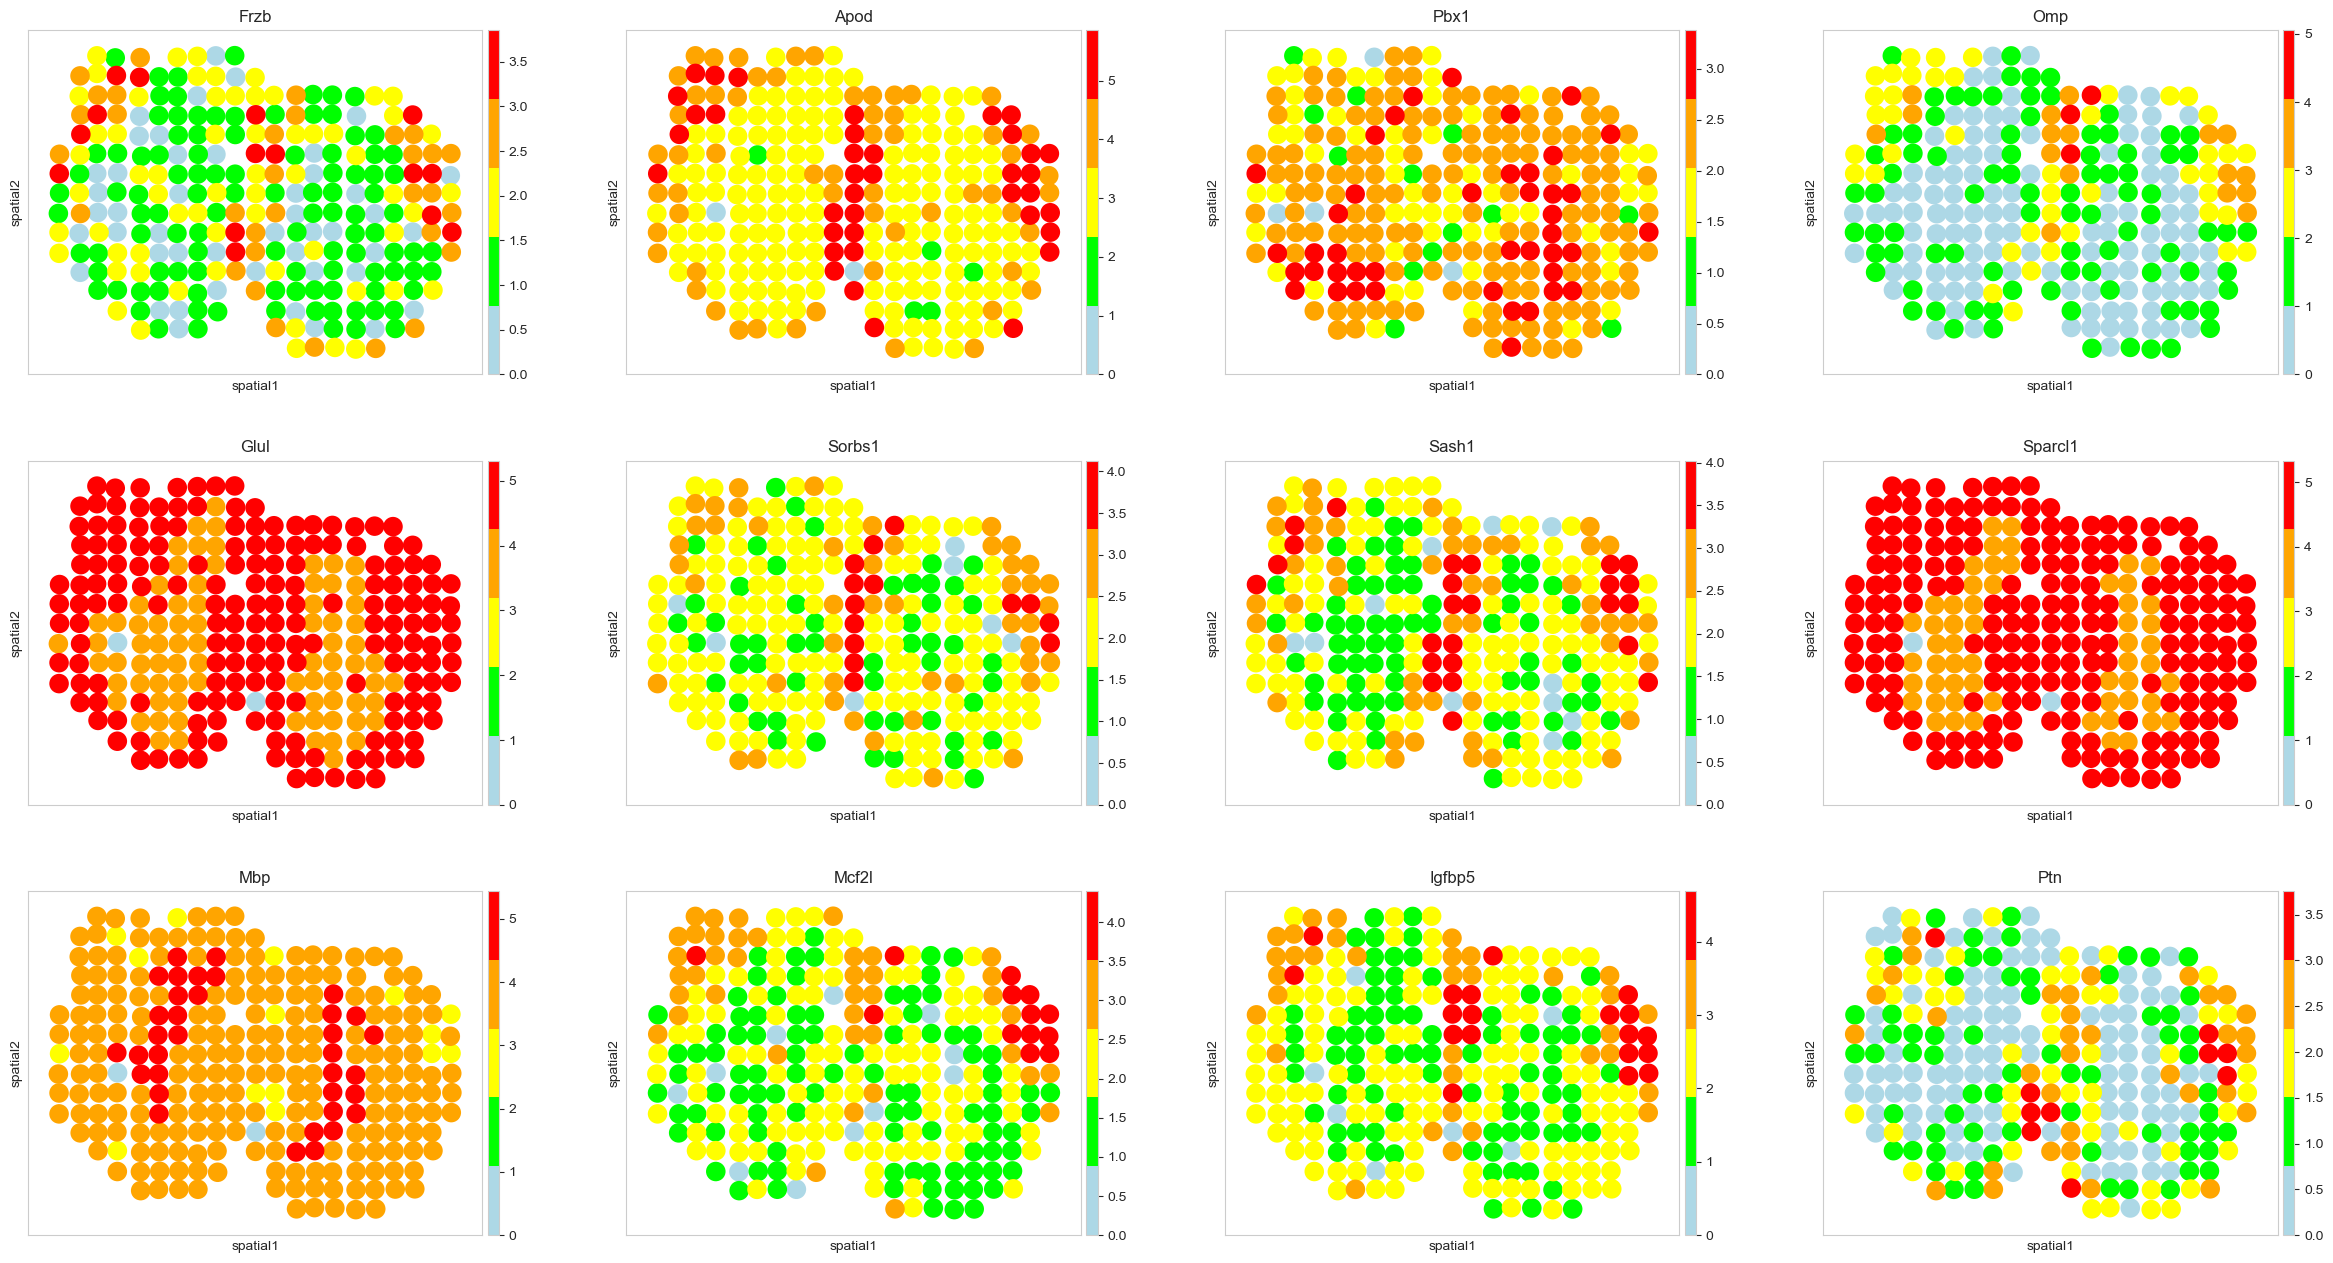

In [31]:
import scanpy as sc
import matplotlib.colors as colors

new_colors = ['lightblue',  '#00FF00','#FFFF00', '#FFA500', '#FF0000']
new_cmap = colors.ListedColormap(new_colors)
sc.pl.spatial(adata,
              size=2,
              spot_size=.5,
              cmap=new_cmap,
              color=list(result[result['labels'] == 2]['gene_id']))

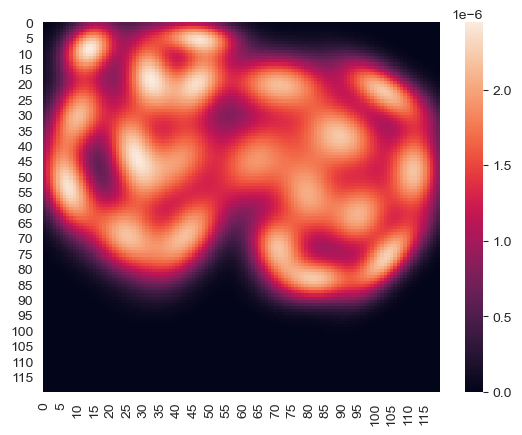

In [32]:
view_gmm(gmm_dict['Mbp'], scope=(0, max(adata.obs['y'].max(), adata.obs['x'].max())), bin_count=120)


In [15]:
gmm_dict['S100a5'].weights_

array([0.04162608, 0.06483896, 0.03440357, 0.02428974, 0.03623904,
       0.02797323, 0.0320036 , 0.05432216, 0.00917431, 0.02916886,
       0.02888132, 0.02453158, 0.04949133, 0.06569616, 0.04215408,
       0.01836539, 0.0078966 , 0.04311388, 0.04951349, 0.03885379,
       0.03237741, 0.01713685, 0.03217209, 0.02612553, 0.02814485,
       0.03071002, 0.02900823, 0.01958033, 0.02656744, 0.03564007])

In [12]:
gmm = fit_gmm(adata, 'Mbp',n_comp=20, top_components=5)

KeyboardInterrupt: 

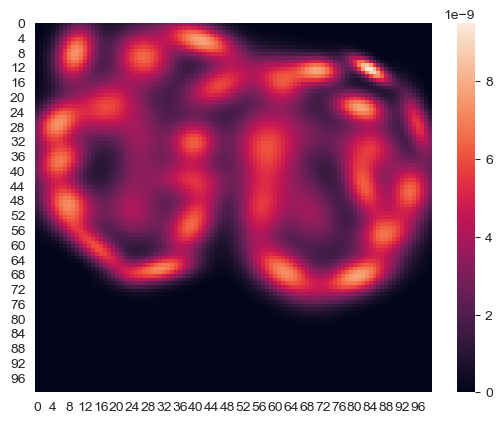

In [13]:
view_gmm(gmm_dict['Doc2g'], scope=(0, max(adata.obs['y'].max(), adata.obs['x'].max())), bin_count=100)

<AxesSubplot:xlabel='labels', ylabel='Count'>

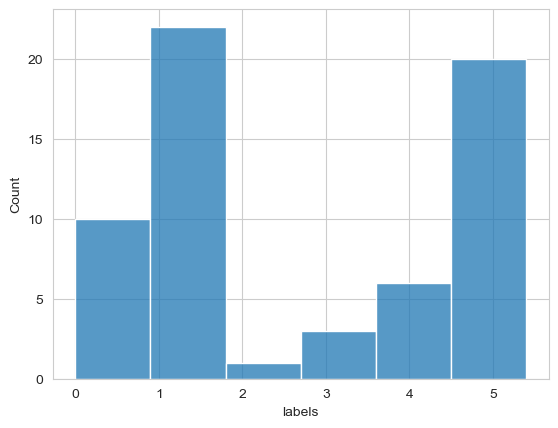

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(result['labels'], binwidth=.9)

In [10]:
gmm = fit_gmm(adata, 'Mbp', n_comp=20, top_components=5)

0.0